<a href="https://colab.research.google.com/github/navrat/EVA_phase1_2022_23/blob/main/S6_Dilated_Convolution_Albumentation/S6_Assignment_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Session 6:
- Leverage code from https://github.com/kuangliu/pytorch-cifar and https://colab.research.google.com/drive/1qlewMtxcAJT6fIJdmMh8pSf2e-dh51Rw and modularize training code to generate all: model.py, evluate.py, utils.py, main.py and master.ipynb
- Leverage Cifar10 dataset
- Train the model for 20 epochs
- Produce accuracy, loss chart ; misclassification rates, misclassified images

## Loading Module and Models

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
!ls /content

evaluate.py	    main.py   __pycache__  utils.py
EVA_phase1_2022_23  model.py  sample_data


In [ ]:
# Future print function
from __future__ import print_function

# Load modules
!git clone https://github.com/navrat/EVA_phase1_2022_23 -q --quiet
!mv EVA_phase1_2022_23/S6_Dilated_Convolution_Albumentation/*.py .
!rm -rf EVA8
print(" Model and related py files uploaded")

# Installing Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet

# Inline matplotlib plotting
%matplotlib inline

 Model and related py files uploaded
  Preparing metadata (setup.py) ... done


## Assignment details:

1. change the code https://colab.research.google.com/drive/1qlewMtxcAJT6fIJdmMh8pSf2e-dh51Rw such that it uses GPU 
2. change the architecture to C1C2C3C40 (No MaxPooling, but 3 3x3 layers with stride of 2 instead) (If you can figure out how to use Dilated kernels here instead of MP or strided convolution)  
3. total RF must be more than 44  
4. one of the layers must use Depthwise Separable Convolution  
5. one of the layers must use Dilated Convolution
6. use GAP (compulsory)
7. add FC after GAP to target #of classes (optional)  
8. use albumentation library and apply:  
    a. horizontal flip  
    b. shiftScaleRotate  
    c. coarseDropout (max_holes = 1, max_height=16px, max_width=1, min_holes = 1, min_height=16px, min_width=16px, fill_value=(mean of your dataset), mask_fill_value = None)  
9. achieve 85% accuracy, as many epochs as you want. Total Params to be less than 200k.  

## Train and Test Cifar10 datasets



In [29]:
from data_loader import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

target_classes = cifar10.classes

CUDA availability ? True
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Data Summary
cifar10.data_summary_stats()

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


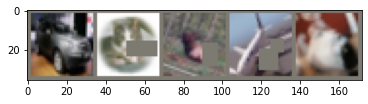

['car', 'cat', 'deer', 'plane', 'cat']


In [34]:
# Sample Images - Training
import utils
utils.plot_sample_images(trainloader, target_classes, 5)

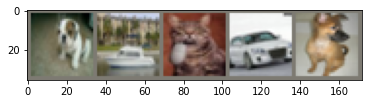

['dog', 'ship', 'cat', 'car', 'dog']


In [36]:
# Sample Images - Testing
import utils
utils.plot_sample_images(testloader, target_classes, 5)

## Model Call

In [52]:
from model import *

# Loading Custom Model
net = Net(dropout_val = 0.05, norm_type = 'BN')

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


## Model Summary



In [53]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4          [-1, 128, 32, 32]           4,096
              ReLU-5          [-1, 128, 32, 32]               0
       BatchNorm2d-6          [-1, 128, 32, 32]             256
           Dropout-7          [-1, 128, 32, 32]               0
            Conv2d-8          [-1, 128, 32, 32]           1,152
              ReLU-9          [-1, 128, 32, 32]               0
      BatchNorm2d-10          [-1, 128, 32, 32]             256
          Dropout-11          [-1, 128, 32, 32]               0
           Conv2d-12           [-1, 32, 32, 32]           4,096
    

## Define a Loss function and optimizer

In [54]:
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

## Training and Testing

In [55]:
# Load train and test model
from main import *

train = train()
test = test()

EPOCHS= 20

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    train.run_training(net, device, trainloader, optimizer, criterion, epoch)
    scheduler.step()
    test.run_testing(net, device, testloader, criterion)

print('Finished Training')

Epoch: 0,Loss=1.42 Batch_id=390 Accuracy=44.31: 100%|██████████| 391/391 [00:31<00:00, 12.32it/s]


Test set: Average loss: 0.0090, Accuracy: 5948/10000 (59.48%)



Epoch: 1,Loss=1.21 Batch_id=390 Accuracy=56.48: 100%|██████████| 391/391 [00:27<00:00, 14.37it/s]


Test set: Average loss: 0.0077, Accuracy: 6521/10000 (65.21%)



Epoch: 2,Loss=0.89 Batch_id=390 Accuracy=62.11: 100%|██████████| 391/391 [00:26<00:00, 14.64it/s]


Test set: Average loss: 0.0067, Accuracy: 7019/10000 (70.19%)



Epoch: 3,Loss=1.01 Batch_id=390 Accuracy=64.98: 100%|██████████| 391/391 [00:23<00:00, 16.87it/s]


Test set: Average loss: 0.0059, Accuracy: 7398/10000 (73.98%)



Epoch: 4,Loss=0.90 Batch_id=390 Accuracy=67.42: 100%|██████████| 391/391 [00:22<00:00, 17.30it/s]


Test set: Average loss: 0.0057, Accuracy: 7472/10000 (74.72%)



Epoch: 5,Loss=0.82 Batch_id=390 Accuracy=69.06: 100%|██████████| 391/391 [00:22<00:00, 17.44it/s]


Test set: Average loss: 0.0055, Accuracy: 7539/10000 (75.39%)



Epoch: 6,Loss=0.82 Batch_id=390 Accuracy=73.48: 100%|██████████| 391/391 [00:22<00:00, 17.26it/s]


Test set: Average loss: 0.0046, Accuracy: 8003/10000 (80.03%)



Epoch: 7,Loss=0.79 Batch_id=390 Accuracy=74.60: 100%|██████████| 391/391 [00:22<00:00, 17.01it/s]


Test set: Average loss: 0.0044, Accuracy: 8094/10000 (80.94%)



Epoch: 8,Loss=0.63 Batch_id=390 Accuracy=75.41: 100%|██████████| 391/391 [00:24<00:00, 15.85it/s]


Test set: Average loss: 0.0044, Accuracy: 8081/10000 (80.81%)



Epoch: 9,Loss=0.56 Batch_id=390 Accuracy=75.66: 100%|██████████| 391/391 [00:21<00:00, 18.22it/s]


Test set: Average loss: 0.0043, Accuracy: 8104/10000 (81.04%)



Epoch: 10,Loss=0.47 Batch_id=390 Accuracy=75.95: 100%|██████████| 391/391 [00:20<00:00, 18.78it/s]


Test set: Average loss: 0.0043, Accuracy: 8164/10000 (81.64%)



Epoch: 11,Loss=0.66 Batch_id=390 Accuracy=76.14: 100%|██████████| 391/391 [00:22<00:00, 17.59it/s]


Test set: Average loss: 0.0042, Accuracy: 8153/10000 (81.53%)



Epoch: 12,Loss=0.69 Batch_id=390 Accuracy=76.89: 100%|██████████| 391/391 [00:21<00:00, 17.99it/s]


Test set: Average loss: 0.0042, Accuracy: 8181/10000 (81.81%)



Epoch: 13,Loss=0.84 Batch_id=390 Accuracy=77.02: 100%|██████████| 391/391 [00:20<00:00, 19.43it/s]


Test set: Average loss: 0.0041, Accuracy: 8183/10000 (81.83%)



Epoch: 14,Loss=0.51 Batch_id=390 Accuracy=76.78: 100%|██████████| 391/391 [00:20<00:00, 19.34it/s]


Test set: Average loss: 0.0041, Accuracy: 8197/10000 (81.97%)



Epoch: 15,Loss=0.75 Batch_id=390 Accuracy=76.83: 100%|██████████| 391/391 [00:22<00:00, 17.36it/s]


Test set: Average loss: 0.0042, Accuracy: 8215/10000 (82.15%)



Epoch: 16,Loss=0.74 Batch_id=390 Accuracy=76.96: 100%|██████████| 391/391 [00:20<00:00, 18.74it/s]


Test set: Average loss: 0.0041, Accuracy: 8193/10000 (81.93%)



Epoch: 17,Loss=0.84 Batch_id=390 Accuracy=77.01: 100%|██████████| 391/391 [00:20<00:00, 19.23it/s]


Test set: Average loss: 0.0041, Accuracy: 8199/10000 (81.99%)



Epoch: 18,Loss=0.50 Batch_id=390 Accuracy=77.23: 100%|██████████| 391/391 [00:20<00:00, 19.31it/s]


Test set: Average loss: 0.0041, Accuracy: 8198/10000 (81.98%)



Epoch: 19,Loss=0.71 Batch_id=390 Accuracy=77.06: 100%|██████████| 391/391 [00:20<00:00, 18.69it/s]


Test set: Average loss: 0.0041, Accuracy: 8200/10000 (82.00%)

Finished Training


## Model Train Evaluation

In [68]:
from evaluate import *
model_eval_f(net, device, trainloader, target_classes)


Test set: Average loss: 0.6277, Accuracy: 39044/50000 (78.09%)


 class wise performance: 

  classes  accuracy
0   plane     70.88
1     car     87.80
2    bird     66.62
3     cat     75.54
4    deer     64.64
5     dog     84.30
6    frog     78.28
7   horse     80.68
8    ship     89.98
9   truck     82.16
              precision    recall  f1-score   support

        bird       0.70      0.71      0.70      5000
         car       0.90      0.88      0.89      5000
         cat       0.61      0.67      0.64      5000
        deer       0.73      0.76      0.74      5000
         dog       0.74      0.65      0.69      5000
        frog       0.79      0.84      0.81      5000
       horse       0.85      0.78      0.81      5000
       plane       0.80      0.81      0.80      5000
        ship       0.84      0.90      0.87      5000
       truck       0.88      0.82      0.85      5000

    accuracy                           0.78     50000
   macro avg       0.78      0.78    

## Model Test Evaluation

In [69]:
from evaluate import *
# model evaluation on misclassifications
model_eval_f(net, device, testloader, target_classes)


Test set: Average loss: 0.5185, Accuracy: 8200/10000 (82.00%)


 class wise performance: 

  classes  accuracy
0   plane      73.8
1     car      92.0
2    bird      68.5
3     cat      80.3
4    deer      68.7
5     dog      89.2
6    frog      84.3
7   horse      83.8
8    ship      91.7
9   truck      87.7
              precision    recall  f1-score   support

        bird       0.74      0.74      0.74      1000
         car       0.92      0.92      0.92      1000
         cat       0.67      0.69      0.68      1000
        deer       0.78      0.80      0.79      1000
         dog       0.81      0.69      0.74      1000
        frog       0.82      0.89      0.86      1000
       horse       0.88      0.84      0.86      1000
       plane       0.82      0.84      0.83      1000
        ship       0.87      0.92      0.89      1000
       truck       0.89      0.88      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82     

## Misclassified Test Images


 # of incorrect images predicted in test dataset of 10000: 1800


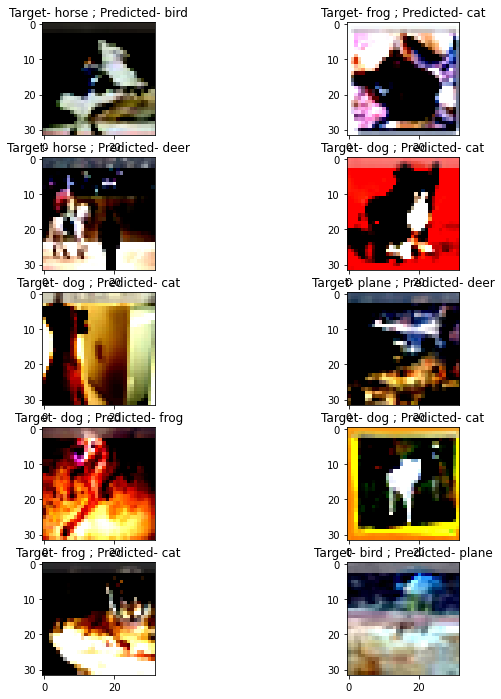



 crosstab of incorrect prediction to understand patterns: 



Predicted,bird,car,cat,deer,dog,frog,horse,plane,ship,truck
Actual,,,,,,,,,,
bird,0,3,45,48,24,51,18,59,9,5
car,1,0,3,1,0,6,3,10,17,39
cat,56,4,0,53,86,56,17,21,17,5
deer,67,1,33,0,12,38,27,9,9,1
dog,34,2,158,39,0,26,35,10,5,4
frog,27,0,41,14,4,0,5,6,5,6
horse,27,0,26,45,27,5,0,15,3,9
plane,33,13,14,12,1,4,9,0,49,27
ship,7,12,5,3,3,3,0,34,0,16


In [82]:
from evaluate import *
plot_mispredictions(net, device, testloader, target_classes, (10,12),10)